# Mini Project 2

### EDA

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay


%matplotlib inline

In [160]:
df=pd.read_csv('Customer_Churn.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [38]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [40]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [41]:
df['Churn'].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

In [129]:
df['Age'].value_counts()


Age
30    1425
25    1037
45     395
55     170
15     123
Name: count, dtype: int64

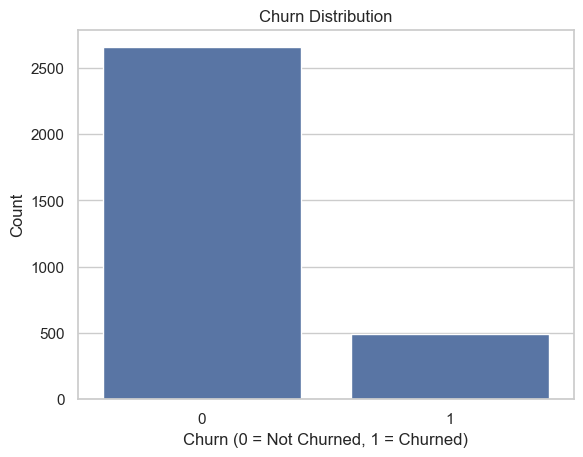

In [135]:
churn_counts = df['Churn'].value_counts()
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = Not Churned, 1 = Churned)')
plt.ylabel('Count')
plt.show()

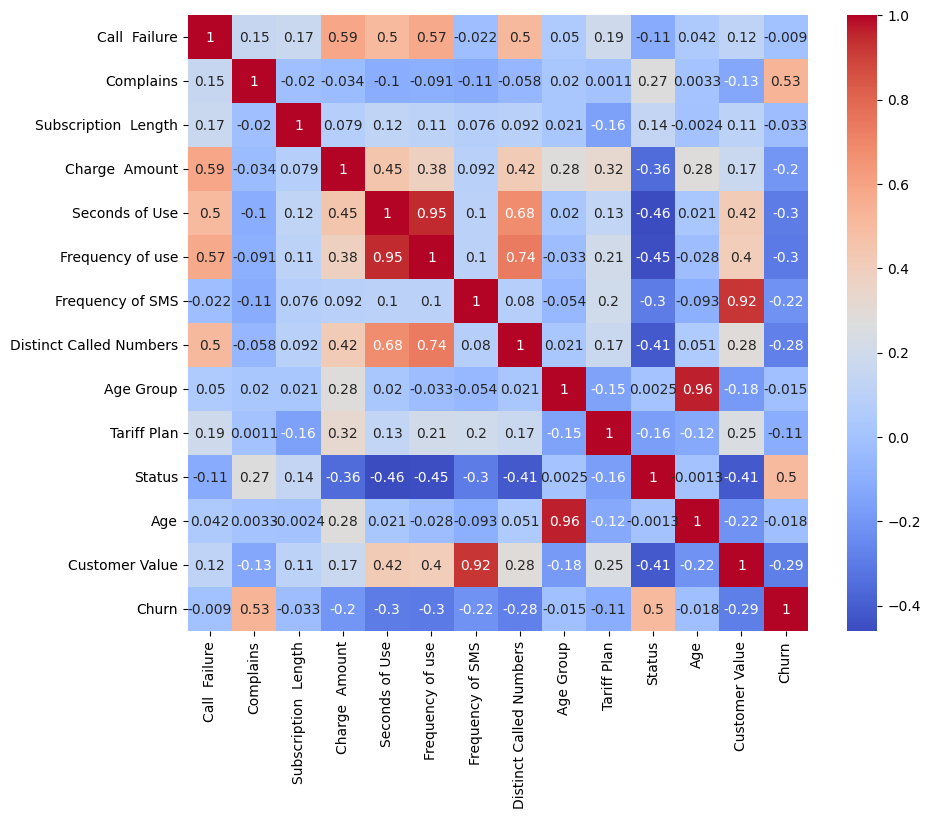

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

/var/folders/88/8c2dgq99663bpg_bf9dqpb0r0000gn/T/ipykernel_3112/73376544.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tariff Plan', y='Churn Rate', data=churn_by_tariff, palette='viridis')


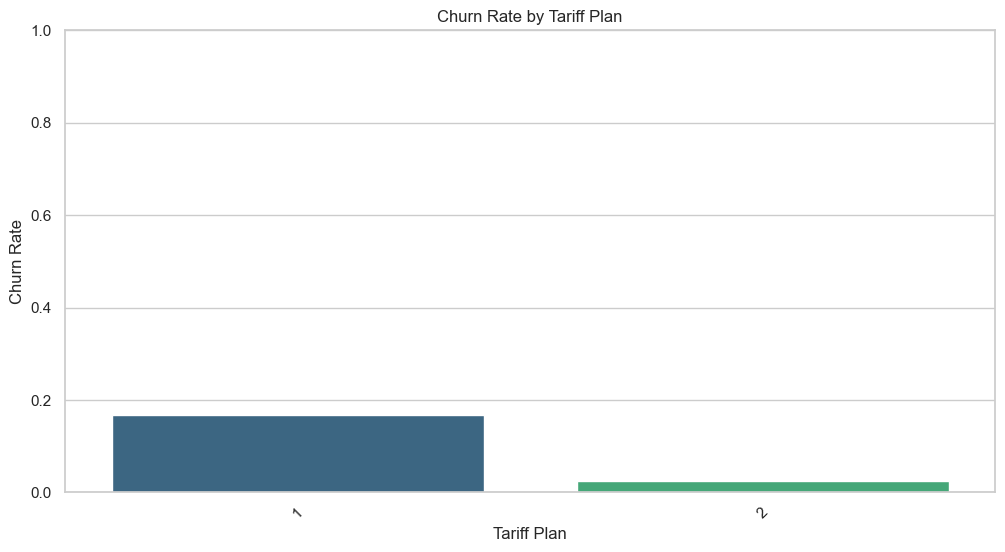

In [132]:
churn_by_tariff = df.groupby('Tariff Plan')['Churn'].mean().reset_index()
churn_by_tariff.columns = ['Tariff Plan', 'Churn Rate']

plt.figure(figsize=(12, 6))
sns.barplot(x='Tariff Plan', y='Churn Rate', data=churn_by_tariff, palette='viridis')
plt.title('Churn Rate by Tariff Plan')
plt.xlabel('Tariff Plan')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.ylim(0, 1)  # To visualize churn rates on a 0-1 scale
plt.show()

In [161]:
bins = [0, 25, 35, 45, 55, 100]  
labels = ['0-25', '26-35', '36-45', '46-55', '55+']

# Create a new column for age group categories
df['Age Group Broad'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Verify the new age groups
print(df[['Age', 'Age Group Broad']].head())

age_group_churn_broad = df.groupby('Age Group Broad')['Churn'].mean().reset_index()

print(age_group_churn_broad)

   Age Age Group Broad
0   30           26-35
1   25           26-35
2   30           26-35
3   15            0-25
4   15            0-25
  Age Group Broad     Churn
0            0-25  0.000000
1           26-35  0.168156
2           36-45       NaN
3           46-55  0.200000
4             55+  0.011765


/var/folders/88/8c2dgq99663bpg_bf9dqpb0r0000gn/T/ipykernel_3112/3365844976.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_churn_broad = df.groupby('Age Group Broad')['Churn'].mean().reset_index()


/var/folders/88/8c2dgq99663bpg_bf9dqpb0r0000gn/T/ipykernel_3112/3620591786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group Broad', y='Churn', data=age_group_churn_broad, palette='coolwarm')


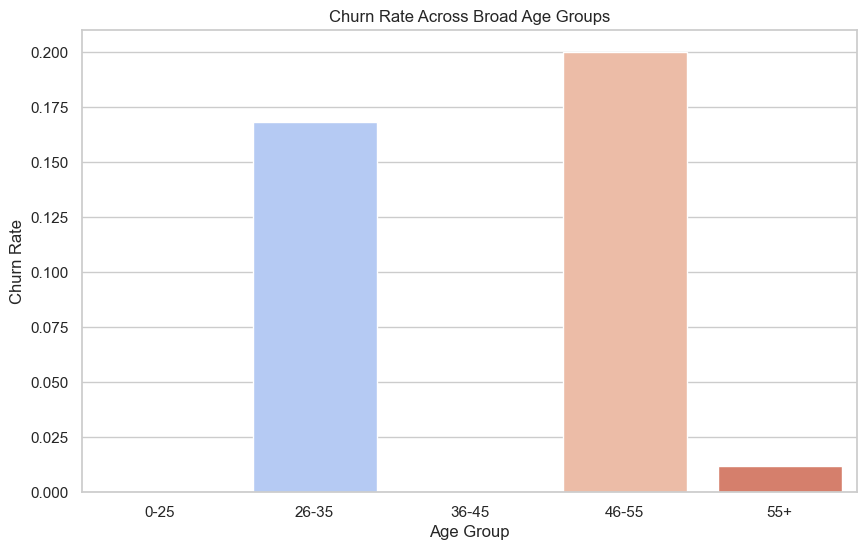

In [162]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group Broad', y='Churn', data=age_group_churn_broad, palette='coolwarm')

# Add titles and labels
plt.title('Churn Rate Across Broad Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.show()

## Building Models

In [44]:
#feature selection
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [45]:
logreg=LogisticRegression(max_iter=100000)

cv_scores_log = cross_val_score(logreg, X_train, y_train, cv=5)

print(f"Logistic Regression CV Scores: {cv_scores_log}")
print(f"Logistic Regression Mean CV Score: {cv_scores_log.mean()}")

Logistic Regression CV Scores: [0.89285714 0.8968254  0.88095238 0.90674603 0.88492063]
Logistic Regression Mean CV Score: 0.8924603174603174


### logistic Regression model

In [46]:

logreg.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

In [47]:
logreg.score(X_train,y_train)

0.8952380952380953

In [79]:
y_pred_log = logreg.predict(X_test)


# Calculate accuracy score
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'Accuracy: {accuracy_log:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_log)
print('Classification Report:')
print(class_report)

Accuracy: 0.88
Confusion Matrix:
[[502  22]
 [ 53  53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       524
           1       0.71      0.50      0.59       106

    accuracy                           0.88       630
   macro avg       0.81      0.73      0.76       630
weighted avg       0.87      0.88      0.87       630



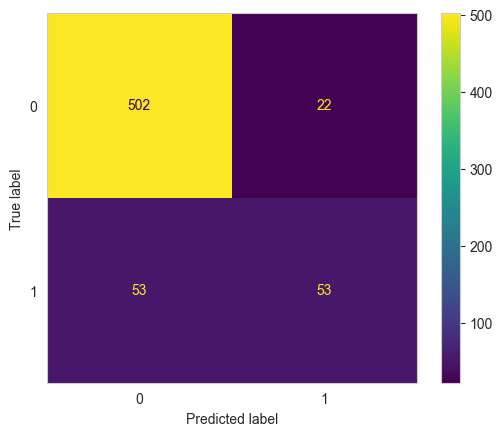

In [112]:


ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log)
plt.show()

#### SVM model

In [49]:
svm = SVC()

cv_scores_svm = cross_val_score(svm, X_train, y_train, cv=5)

print(f"SVM CV Scores: {cv_scores_svm}")
print(f"SVM Mean CV Score: {cv_scores_svm.mean()}")

SVM CV Scores: [0.84722222 0.8452381  0.8452381  0.8452381  0.8452381 ]
SVM Mean CV Score: 0.8456349206349205


In [50]:
svm.fit(X_train,y_train)

SVC()

In [51]:
y_pred_svm = svm.predict(X_test)

svm.score(X_train,y_train)

0.8456349206349206

In [92]:
y_pred_svm= svm.predict(X_test)


# Calculate accuracy score
accuracy_svm= accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_svm,zero_division=0)
print('Classification Report:')
print(class_report)

Accuracy: 0.83
Confusion Matrix:
[[524   0]
 [106   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       524
           1       0.00      0.00      0.00       106

    accuracy                           0.83       630
   macro avg       0.42      0.50      0.45       630
weighted avg       0.69      0.83      0.76       630



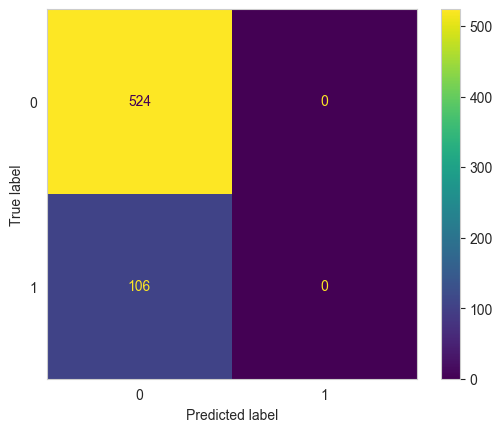

In [113]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.show()

### Naive Bayes

In [53]:
nb = GaussianNB()

cv_scores_nb = cross_val_score(nb, X_train, y_train, cv=5)

print(f"NB CV Scores: {cv_scores_nb}")
print(f"NB Mean CV Score: {cv_scores_nb.mean()}")



NB CV Scores: [0.74801587 0.75595238 0.70238095 0.72619048 0.7202381 ]
NB Mean CV Score: 0.7305555555555556


In [54]:
nb.fit(X_train, y_train)

GaussianNB()

In [93]:

y_pred_nb= nb.predict(X_test)


# Calculate accuracy score
accuracy_nb= accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy_nb:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_nb)
print('Classification Report:')
print(class_report)

Accuracy: 0.74
Confusion Matrix:
[[367 157]
 [  8  98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.70      0.82       524
           1       0.38      0.92      0.54       106

    accuracy                           0.74       630
   macro avg       0.68      0.81      0.68       630
weighted avg       0.88      0.74      0.77       630



In [56]:
nb.score(X_train,y_train)

0.7333333333333333

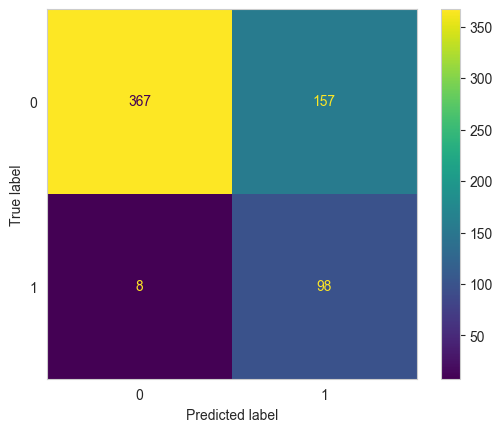

In [115]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)
plt.show()

### K-Nearest Neighbors (KNN)

In [57]:
knn= KNeighborsClassifier(n_neighbors=5)

cv_scores_knn = cross_val_score(knn, X_train, y_train, cv=5)

print(f"SVM CV Scores: {cv_scores_svm}")
print(f"SVM Mean CV Score: {cv_scores_svm.mean()}")

SVM CV Scores: [0.84722222 0.8452381  0.8452381  0.8452381  0.8452381 ]
SVM Mean CV Score: 0.8456349206349205


In [67]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [98]:
# Predict on the test set
y_pred_knn= knn.predict(X_test)


# Calculate accuracy score
accuracy_knn= accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_knn)
print('Classification Report:')
print(class_report)

Accuracy: 0.83
Confusion Matrix:
[[484  40]
 [ 64  42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       524
           1       0.51      0.40      0.45       106

    accuracy                           0.83       630
   macro avg       0.70      0.66      0.67       630
weighted avg       0.82      0.83      0.83       630



In [60]:
knn.score(X_train,y_train)

0.8960317460317461

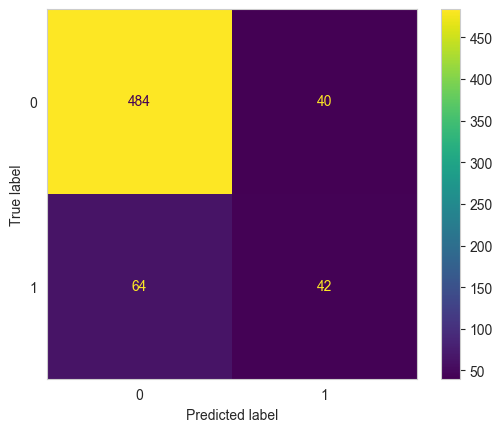

In [114]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.show()

### Predicted probabilities

In [70]:
y_pred_prob_log = logreg.predict_proba(X_test)[:, 1]  
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log)
roc_auc_log = roc_auc_score(y_test, y_pred_prob_log)

# SVM (use decision function instead of predict_proba for linear kernel)
y_pred_svm = svm.decision_function(X_test)  # Decision scores for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

# KNN
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)

# Naive Bayes
y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_prob_nb)




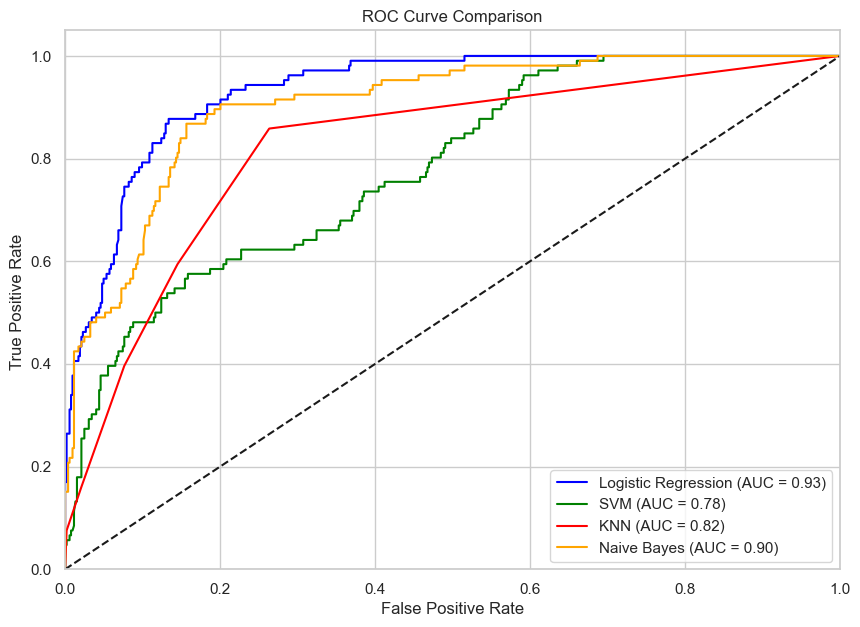

In [133]:
# Plotting the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})', color='blue')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', color='green')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})', color='red')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})', color='orange')

# Diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.show()

###   Key features influencing churn

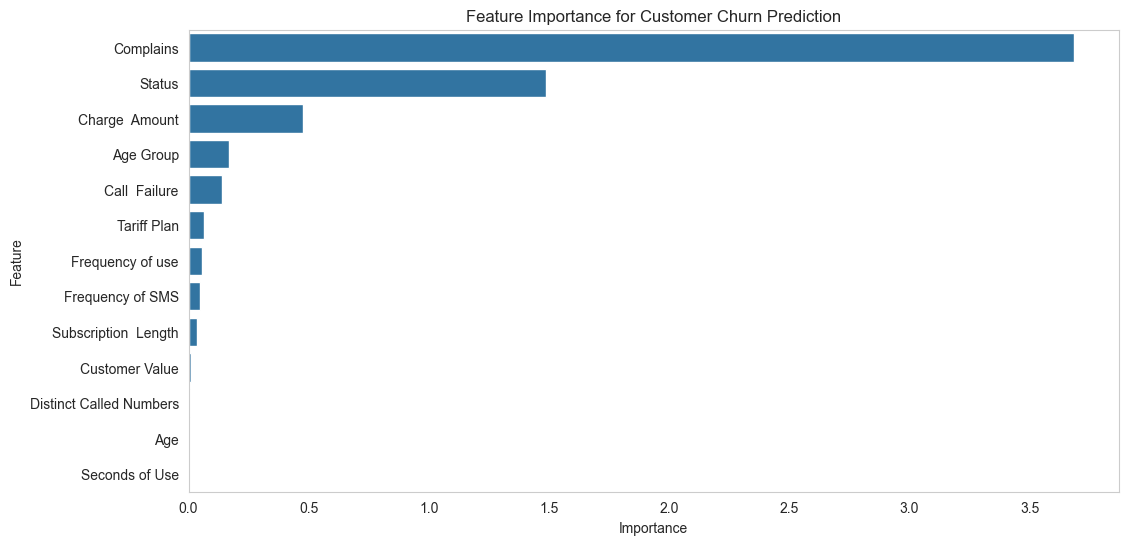

In [126]:
importance = np.abs(logreg.coef_[0])
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Customer Churn Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### END